In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

1. Recorre todos los archivos CSV de un directorio y concatena su contenido en un solo DataFrame.

In [19]:
from google.colab import files

# Selecciona y sube los archivos CSV desde tu computadora
uploaded = files.upload()

Saving datos_alumnos.csv to datos_alumnos (2).csv
Saving datos_alumnos2.csv to datos_alumnos2 (2).csv
Saving libro_alumnos_1.xlsx to libro_alumnos_1 (2).xlsx
Saving libro_alumnos_2.xlsx to libro_alumnos_2 (2).xlsx


In [20]:
def leer_csv_robusto(filepath):
    try:
        return pd.read_csv(filepath, encoding='utf-8')
    except UnicodeDecodeError:
        return pd.read_csv(filepath, encoding='latin1')

# Filtrar solo los archivos CSV subidos
csv_files = [filename for filename in uploaded.keys() if filename.endswith('.csv')]

# Leer y concatenar todos los CSV en un solo DataFrame
df_csv = pd.concat([leer_csv_robusto(f) for f in csv_files], ignore_index=True)

print("DataFrame concatenado de CSVs:")
print(df_csv.head())

DataFrame concatenado de CSVs:
  ID_Alumno         Nombre  Edad    Ciudad      Materia  Nota_Final
0     A1000   Pedro Torres    16    Madrid       Lengua         9.3
1     A1001    Miguel Vega    15  Valencia  Matemáticas         4.6
2     A1002    Ana Sánchez    18    Bilbao       Inglés         5.2
3     A1003  Pedro Sánchez    15    Madrid       Lengua         6.6
4     A1004  Elena Sánchez    18    Madrid       Inglés         8.4


2. Recorre todos los archivos Excel (.xls, .xlsx) del mismo directorio, leyendo la hoja principal de cada uno y concatenando los datos en otro DataFrame.

In [21]:
# Filtrar solo los archivos Excel subidos (.xls y .xlsx)
excel_files = [filename for filename in uploaded.keys() if filename.endswith('.xls') or filename.endswith('.xlsx')]

# Leer y concatenar la hoja principal de cada archivo Excel en un solo DataFrame
df_excel = pd.concat([pd.read_excel(f) for f in excel_files], ignore_index=True)

print("DataFrame concatenado de Excels:")
print(df_excel.head())

DataFrame concatenado de Excels:
  ID_Alumno           Nombre  Edad     Ciudad Materia  Nota_Final
0     C3000       Luis Gomez    17     Bilbao  Ingles         5.4
1     C3001       Sofia Vega    14     Madrid  Ingles         5.2
2     C3002     Juan Sanchez    18  Barcelona  Lengua         9.3
3     C3003      Ana Sanchez    17  Barcelona  Lengua         8.0
4     C3004  Pedro Rodriguez    17   Valencia  Lengua         6.6


3. Integra ambos DataFrames (CSV y Excel) en un solo DataFrame global.

In [22]:
# -----------------------------
# 3. Integrar ambos en un DataFrame global
# -----------------------------
df_global = pd.concat([df_csv, df_excel], ignore_index=True)

# Mostrar muestra del DataFrame final
print("DataFrame GLOBAL (CSV + Excel):")
print(df_global.head())

# -----------------------------
# Guardar como archivo combinado
# -----------------------------
archivo_global = os.path.join('.', 'dataframe_global.xlsx')
df_global.to_excel(archivo_global, index=False)
print(f"Data Frame global generado: {archivo_global}")

DataFrame GLOBAL (CSV + Excel):
  ID_Alumno         Nombre  Edad    Ciudad      Materia  Nota_Final
0     A1000   Pedro Torres    16    Madrid       Lengua         9.3
1     A1001    Miguel Vega    15  Valencia  Matemáticas         4.6
2     A1002    Ana Sánchez    18    Bilbao       Inglés         5.2
3     A1003  Pedro Sánchez    15    Madrid       Lengua         6.6
4     A1004  Elena Sánchez    18    Madrid       Inglés         8.4
Data Frame global generado: ./dataframe_global.xlsx


4.Extrae una tabla de la web (por ejemplo, la tabla de países por población de Wikipedia) usando pd.read_html().
Agrega esta tabla como una hoja adicional en el archivo Excel final.

In [23]:
# -----------------------------
# 4. Extrae una tabla de la web (por ejemplo, la tabla de países por población de Wikipedia) usando pd.read_html().
# Agrega esta tabla como una hoja adicional en el archivo Excel final.
# -----------------------------

url = "https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n"
tablas = pd.read_html(url)
tabla_paises = tablas[0]

# Guardar como Excel
with pd.ExcelWriter("dataframe_global.xlsx", engine='openpyxl', mode='a') as writer:
    tabla_paises.to_excel(writer, sheet_name='Paises_Poblacion', index=False)

5. Genera una hoja resumen con estadísticas descriptivas básicas (describe()) del DataFrame global

In [24]:
# 5. Genera una hoja resumen con estadísticas descriptivas básicas (describe()) del DataFrame global.

# Generar estadísticas descriptivas
estadisticas_global = df_global.describe(include='all') # include='all' para incluir columnas no numéricas

# Guardar las estadísticas en una nueva hoja en el mismo archivo Excel
with pd.ExcelWriter("dataframe_global.xlsx", engine='openpyxl', mode='a') as writer:
    estadisticas_global.to_excel(writer, sheet_name='Estadisticas_Global')

print("Hoja 'Estadisticas_Global' agregada al archivo Excel.")

Hoja 'Estadisticas_Global' agregada al archivo Excel.


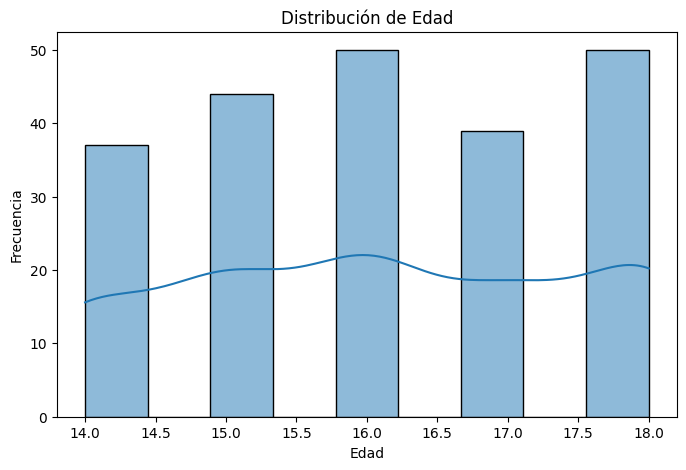

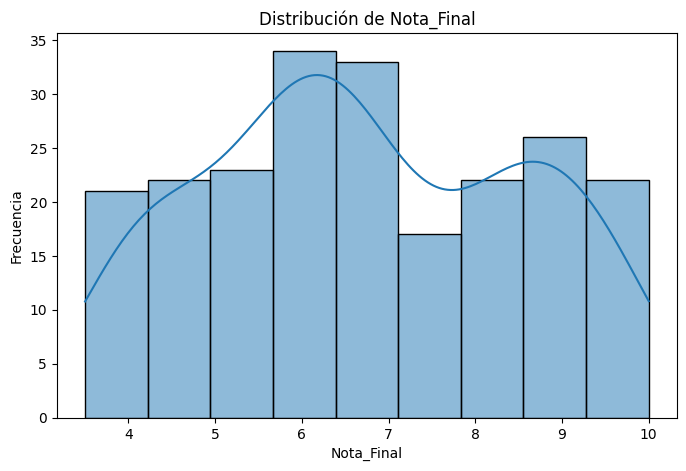

In [25]:
#Adicional complementario
# Seleccionar columnas numéricas para histogramas
columnas_numericas = ['Edad', 'Nota_Final']

# Crear histogramas para cada columna numérica
for col in columnas_numericas:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_global, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

 6. Exporta los resultados a un archivo Excel llamado consolidado_resultados.xlsx con al menos las siguientes hojas:

 • "Datos_CSV"

 • "Datos_Excel"

 • "Resumen"

 • "Web"

In [26]:
# 6 "Datos_CSV", "Datos_Excel", "Resumen", "Web"

# Define el nombre del archivo Excel de salida
output_excel_file = "consolidado_resultados.xlsx"

# Crea un objeto ExcelWriter para escribir en el archivo
# 'replace' mode will overwrite if the file exists, 'a' mode is for appending sheets
with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
    # Escribe el DataFrame de CSVs en la hoja "Datos_CSV"
    if 'df_csv' in locals() and not df_csv.empty:
        df_csv.to_excel(writer, sheet_name="Datos_CSV", index=False)

    # Escribe el DataFrame de Excels en la hoja "Datos_Excel"
    if 'df_excel' in locals() and not df_excel.empty:
        df_excel.to_excel(writer, sheet_name="Datos_Excel", index=False)

    # Escribe las estadísticas descriptivas del DataFrame global en la hoja "Resumen"
    # Ensure df_global exists and is not empty before describing
    if 'df_global' in locals() and not df_global.empty:
        estadisticas_global = df_global.describe(include='all')
        estadisticas_global.to_excel(writer, sheet_name="Resumen")

    # Escribe la tabla web en la hoja "Web"
    # Ensure tabla_paises exists and is not empty
    if 'tabla_paises' in locals() and not tabla_paises.empty:
        tabla_paises.to_excel(writer, sheet_name="Web", index=False)

print(f"Resultados exportados a '{output_excel_file}' con las hojas: Datos_CSV, Datos_Excel, Resumen, Web")

# Opcional: Descargar el archivo Excel
# files.download(output_excel_file)


Resultados exportados a 'consolidado_resultados.xlsx' con las hojas: Datos_CSV, Datos_Excel, Resumen, Web
